In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from Tutorial.Dataset import load_scg
from scipy.interpolate import interp1d


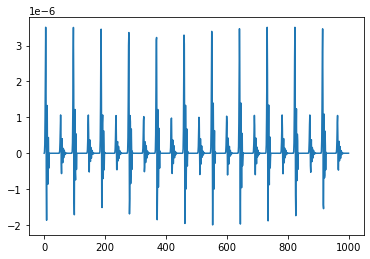

In [158]:
path_RR = "D:\PHD\Research\Data\RemoveRR\sim_5000_0_90_140_train_NoRR.npy"
data_RR = np.load(path_RR)
signals_RR_l, labels_RR_l = data_RR[:, :1000], data_RR[:, 1000:]
plt.plot(signals_RR_l[333])

In [40]:
# def std_data():
#     path_RR = "D:\PHD\Research\Data\RemoveRR\simu_0_90_180R.npy"
#     path_NoRR = "D:\PHD\Research\Data\RemoveRR\simu_0_90_180_NoRR.npy"
#
#
#     data_RR = np.load(path_RR)
#     data_NoRR = np.load(path_NoRR)
#     signals_RR_l, labels_RR_l = data_RR[:, :1000], data_RR[:, 1000:]
#     signals_NoRR_l, labels_NoRR_l = data_NoRR[:, :1000], data_NoRR[:, 1000:]
#
#     signals_l_RR_ls = []
#     labels_l_RR_ls = []
#     for cnt, signal in enumerate(signals_RR_l):
#         if max(signal) > 1:
#             continue
#         signals_l_RR_ls.append(signal)
#         labels_l_RR_ls.append(labels_RR_l[cnt])
#
#     signals_l_NoRR_ls = []
#     labels_l_NoRR_ls = []
#     for cnt, signal in enumerate(signals_NoRR_l):
#         if max(signal) > 1:
#             continue
#         signals_l_NoRR_ls.append(signal)
#         labels_l_NoRR_ls.append(labels_NoRR_l[cnt])
#
#
#     signals_l_RR = np.array(signals_l_RR_ls)
#     signals_l_NoRR = np.array(signals_l_NoRR_ls)
#     labels_l_RR = np.array(labels_l_RR_ls)
#     labels_l_NoRR = np.array(labels_l_NoRR_ls)
#     print(signals_l_RR.shape, labels_l_NoRR.shape)
#     return labels_l_RR, labels_l_NoRR, signals_l_RR, signals_l_NoRR


def std_data(RR):
    if RR == 0:
        path_train = "D:\PHD\Research\Data\RemoveRR\sim_5000_0_90_140_train_NoRR.npy"
        path_test = "D:\PHD\Research\Data\RemoveRR\sim_3000_0_141_178_test_NoRR.npy"
    elif RR == 1:
        path_train = "D:\PHD\Research\Data\RemoveRR\sim_5000_0_90_140_train_RR.npy"
        path_test = "D:\PHD\Research\Data\RemoveRR\sim_3000_0_141_178_test_RR.npy"

    data_train = np.load(path_train)
    data_test = np.load(path_test)
    signals_train_l, labels_train_l = data_train[:, :1000], data_train[:, 1000:]
    signals_test_l, labels_test_l = data_test[:, :1000], data_test[:, 1000:]

    signals_l_train_ls = []
    labels_l_train_ls = []
    for cnt, signal in enumerate(signals_train_l):
        if max(signal) > 1:
            continue
        signals_l_train_ls.append(signal)
        labels_l_train_ls.append(labels_train_l[cnt])

    signals_l_test_ls = []
    labels_l_test_ls = []
    for cnt, signal in enumerate(signals_test_l):
        if max(signal) > 1:
            continue
        signals_l_test_ls.append(signal)
        labels_l_test_ls.append(labels_test_l[cnt])


    signals_l_train = np.array(signals_l_train_ls)
    signals_l_test = np.array(signals_l_test_ls)
    labels_l_train = np.array(labels_l_train_ls)
    labels_l_test = np.array(labels_l_test_ls)
    print(signals_l_train.shape, labels_l_test.shape)
    return labels_l_train, labels_l_test, signals_l_train, signals_l_test

In [114]:
# peaks detection from Yida
def update_array(a, data_tmp):
    i = 0
    while i < len(a) - 2:
        if data_tmp[a[i]] < data_tmp[a[i + 1]] < data_tmp[a[i + 2]]:
            a = np.delete(a, i)
        elif data_tmp[a[i]] > data_tmp[a[i + 1]] > data_tmp[a[i + 2]]:
            a = np.delete(a, i + 2)
        else:
            i += 1
    return a

def get_peaks(data_tmp, duration, sampling_rate, dis):
    max = np.max(data_tmp)
    data_tmp = data_tmp / max

    t = np.linspace(0, duration, duration * sampling_rate)
    signal = data_tmp

    peak_indices, _ = find_peaks(signal)

    t_peaks = t[peak_indices]
    peak_values = signal[peak_indices]
    interpolation_func = interp1d(t_peaks, peak_values, kind='linear', bounds_error=False, fill_value=0)
    envelope = interpolation_func(t)

    peaks2, _ = find_peaks(envelope, distance=dis)

    peaks2 = update_array(peaks2, data_tmp)
    if len(peaks2) % 2 != 0:
        peaks2 = np.delete(peaks2, len(peaks2) - 1)

    return peaks2


In [105]:
def update_array(a, data_tmp):
    i = 0
    while i < len(a) - 2:
        if data_tmp[a[i]] < data_tmp[a[i + 1]] < data_tmp[a[i + 2]]:
            a = np.delete(a, i)
        elif data_tmp[a[i]] > data_tmp[a[i + 1]] > data_tmp[a[i + 2]]:
            a = np.delete(a, i + 2)
        else:
            i += 1
    return a

In [106]:
def delete_unique(a):
    mean = np.mean(a)
    std = np.std(a)
    threshold = 1
    filtered_a = a[np.abs(a - mean) <= threshold * std]

    return filtered_a

def get_mag_0(peaks2, data_tmp):
    mag = data_tmp[peaks2[::2]]
    mean_mag = np.mean(mag)
    std_mag = np.std(mag)
    filtered_mag = mag[np.abs(mag-mean_mag) <= std_mag]
    return np.mean(filtered_mag)

def get_mag_1(peaks2, data_tmp):
    mag = data_tmp[peaks2[1::2]]
    mean_mag = np.mean(mag)
    std_mag = np.std(mag)
    filtered_mag = mag[np.abs(mag-mean_mag) <= std_mag]
    return np.mean(filtered_mag)

def get_features(data_tmp, peaks2):
    maxm = np.max(data_tmp)
    data_tmp_raw = data_tmp

    data_tmp = data_tmp_raw / maxm

    diff_12 = peaks2[1::2] - peaks2[0::2]
    diff_21 = peaks2[2::2] - peaks2[1:-1:2]

    diff_12 = delete_unique(diff_12)
    diff_21 = delete_unique(diff_21)

    m_12 = np.mean(diff_12)
    m_21 = np.mean(diff_21)

    mag_1 = get_mag_1(peaks2, data_tmp)
    mag_0 = get_mag_0(peaks2, data_tmp)

    features = np.array([ m_12/m_21, mag_0/mag_1])

    return features

In [144]:
def segmentation(signal, rpeak):
    begin, end = 0, 0
    margin = rpeak[0]
    pieces = []
    reconstructed_signal = []
    for num in range(1, len(rpeak)):
        begin = end
        end = rpeak[num] - margin
        piece = signal[begin: end]
        piece = (piece - piece.mean()) / piece.std()
        # piece = (piece - piece.min()) / piece.max()
        pieces.append(piece)
        reconstructed_signal.extend(piece)

    last_piece = signal[end:]
    last_piece = (last_piece - last_piece.mean()) / last_piece.std()

    pieces.append(last_piece)
    reconstructed_signal.extend(last_piece)

    return np.array(reconstructed_signal)

In [170]:
def extract_RR(signals, labels, alpha):
    show = False
    features_NoTemplate_RR = []

    for cnt, signal in tqdm(enumerate(signals)):
        hr = labels[cnt, 2]

        large_peaks, _ = find_peaks(signal, height=np.max(signal) * 0.12, distance=5000 // (hr * alpha))

        # RR
        reconstructed_signal = segmentation(signal, large_peaks)

        allpeaks, _ = find_peaks(reconstructed_signal, height=np.max(reconstructed_signal) * 0.1, distance=2000 // (hr * alpha))
        allpeaks = update_array(allpeaks, reconstructed_signal / np.max(reconstructed_signal))
        if len(allpeaks) % 2 != 0:
            allpeaks = np.delete(allpeaks, len(allpeaks) - 1)

        features = get_features(reconstructed_signal, allpeaks)
        features_NoTemplate_RR.append(features)

        if features[1] < 100:
            continue

        if show:
            print(hr)

            plt.subplots(2, 1, figsize=(12, 6))
            plt.subplot(211)
            plt.plot(reconstructed_signal)
            plt.subplot(212)
            plt.plot(signal)

            # plt.scatter(allpeaks, reconstructed_signal[allpeaks])
            plt.show()

    return  np.array(features_NoTemplate_RR)

In [171]:
def extract_NoRR(signals, labels, alpha):
    show = True
    features_NoTemplate_NoRR = []

    for cnt, signal in tqdm(enumerate(signals)):
        # if cnt % 523 != 0:
        #     continue
        hr = labels[cnt, 2]

        S = labels[cnt, 4]
        D = labels[cnt, 5]

        allpeaks, _ = find_peaks(signal, height=np.max(signal) * 0.1, distance=2000 // (hr * alpha))
        allpeaks = update_array(allpeaks, signal / np.max(signal))
        if len(allpeaks) % 2 != 0:
            allpeaks = np.delete(allpeaks, len(allpeaks) - 1)
        # print(allpeaks)
        features = get_features(signal, allpeaks)
        features_NoTemplate_NoRR.append(features)

        # if show:
        #     plt.figure()
        #     plt.plot(signal)
        #     plt.scatter(allpeaks, signal[allpeaks])
        #     # plt.title('S:{}, D:{}, d1/d2:{}, A1/A2:{}'.format(S, D, round(features[0],3), round(features[1],3)))
        #     plt.show()

    return  np.array(features_NoTemplate_NoRR)

In [172]:
from tqdm import tqdm
if __name__=='__main__':
    labels_train_NoRR, labels_test_NoRR, signals_train_NoRR, signals_test_NoRR = std_data(0)
    labels_train_RR, labels_test_RR, signals_train_RR, signals_test_RR = std_data(1)

    features_NoTemplate_RR_train = extract_RR(signals_train_RR, labels_train_RR, 1)
    features_NoTemplate_RR_test = extract_RR(signals_test_RR, labels_test_RR, 1.2)

    features_NoTemplate_NoRR_train = extract_NoRR(signals_train_NoRR, labels_train_NoRR, 1)
    features_NoTemplate_NoRR_test = extract_NoRR(signals_test_NoRR, labels_test_NoRR, 1.2)

(4687, 1000) (2853, 6)
(4687, 1000) (2853, 6)


4687it [00:06, 742.15it/s]
2853it [00:04, 657.37it/s]
4687it [00:02, 2278.56it/s]
2853it [00:01, 2292.43it/s]


In [141]:
features_NoTemplate_NoRR_train[:, 0].shape,features_NoTemplate_NoRR_test[:, 0].shape,labels_train_NoRR[:, 4].shape,labels_test_NoRR[:, 4].shape

((4687,), (2853,), (4687,), (2853,))

In [142]:
sum(features_NoTemplate_NoRR_train[:, 1] > 100)

0

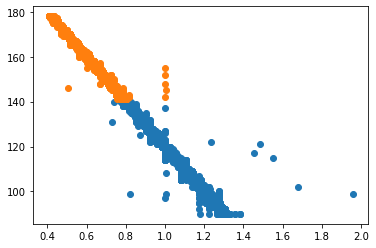

1.3199840807461611


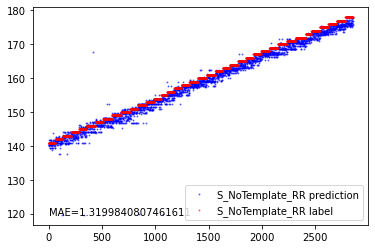

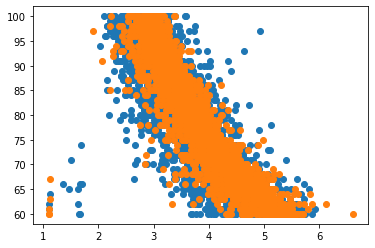

3.982543808753184


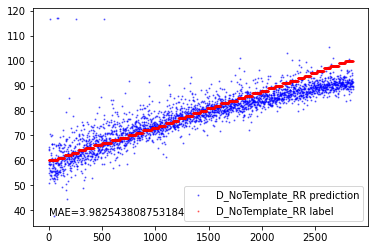

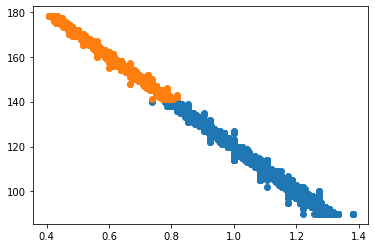

0.832041181335758


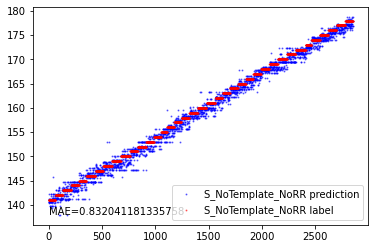

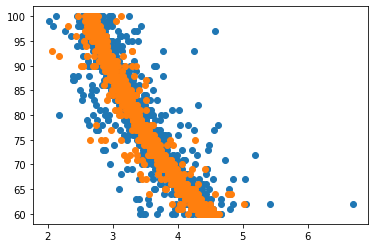

1.7815612758086479


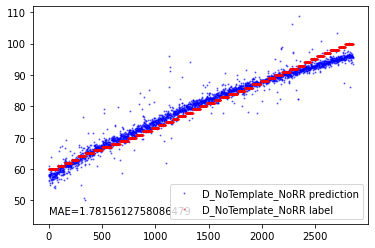

In [148]:
from sklearn.linear_model import LinearRegression as LR
from Tutorial.utils import plot_2vectors

def plot_plot(features_train, features_test, labels_train, labels_test, title):
    plt.figure()
    plt.scatter(np.array(features_train), labels_train)
    plt.scatter(np.array(features_test), labels_test)
    plt.show()

    reg = LR().fit(np.array(features_train).reshape(-1, 1), labels_train)
    yhat = reg.predict(np.array(features_test).reshape(-1, 1))
    print(np.mean(np.abs(yhat - labels_test)))

    plot_2vectors(labels_test, yhat, False, title)

plot_plot(features_NoTemplate_RR_train[:, 0],features_NoTemplate_RR_test[:, 0],labels_train_RR[:, 4],labels_test_RR[:, 4],'S_NoTemplate_RR')
plot_plot(features_NoTemplate_RR_train[:, 1],features_NoTemplate_RR_test[:, 1],labels_train_RR[:, 5],labels_test_RR[:, 5],'D_NoTemplate_RR')

plot_plot(features_NoTemplate_NoRR_train[:, 0],features_NoTemplate_NoRR_test[:, 0],labels_train_NoRR[:, 4],labels_test_NoRR[:, 4],'S_NoTemplate_NoRR')
plot_plot(features_NoTemplate_NoRR_train[:, 1],features_NoTemplate_NoRR_test[:, 1],labels_train_NoRR[:, 5],labels_test_NoRR[:, 5],'D_NoTemplate_NoRR')






0it [00:00, ?it/s]

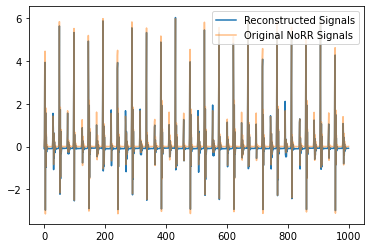

1it [00:00,  7.52it/s]

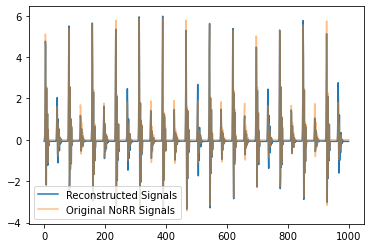

102it [00:00, 388.02it/s]

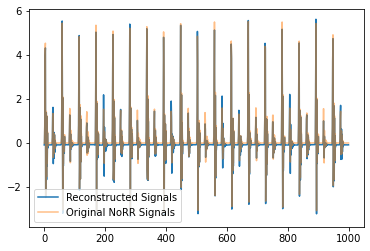

203it [00:00, 468.58it/s]

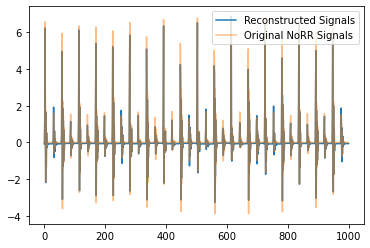

304it [00:00, 552.14it/s]

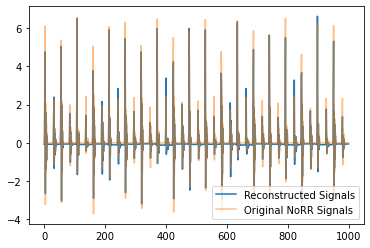

405it [00:00, 564.21it/s]

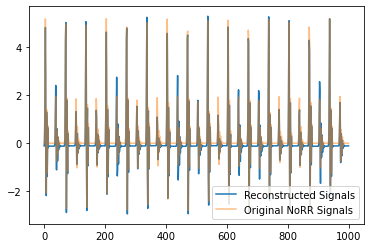

506it [00:00, 619.06it/s]

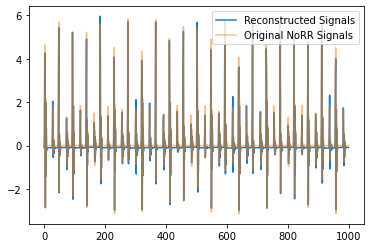

607it [00:01, 653.29it/s]

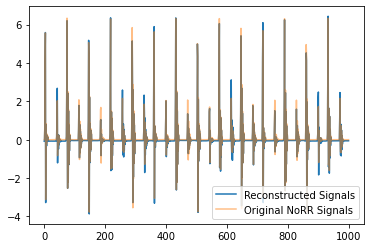

708it [00:01, 637.92it/s]

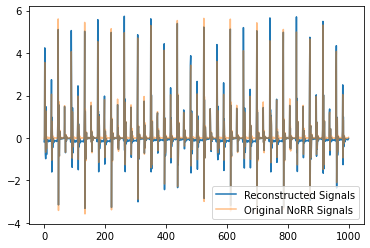

809it [00:01, 667.85it/s]

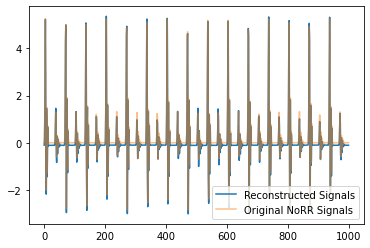

910it [00:01, 685.15it/s]

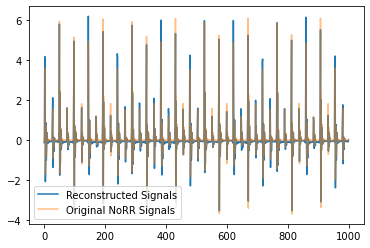

1011it [00:01, 700.46it/s]

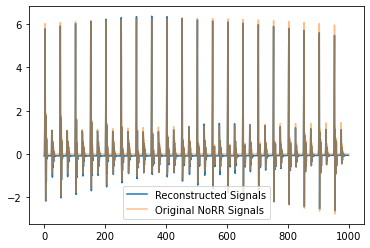

1112it [00:01, 719.11it/s]

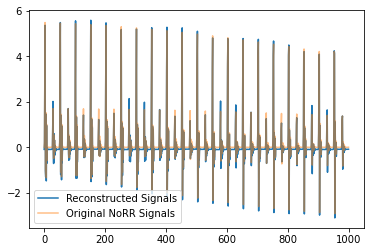

1213it [00:01, 726.11it/s]

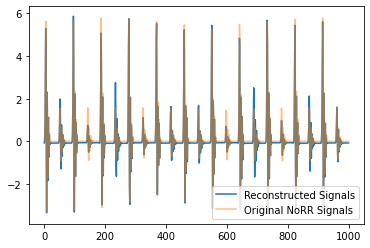

1314it [00:02, 732.59it/s]

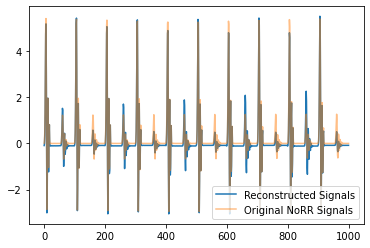

1415it [00:02, 750.51it/s]

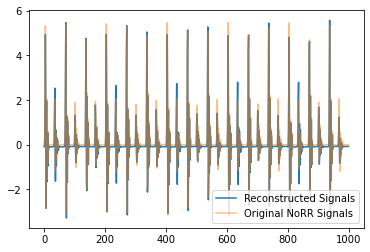

1516it [00:02, 744.80it/s]

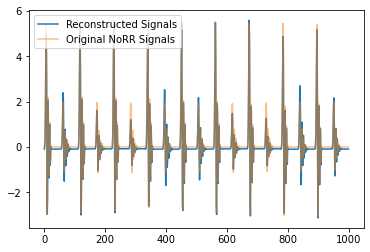

1617it [00:02, 750.81it/s]

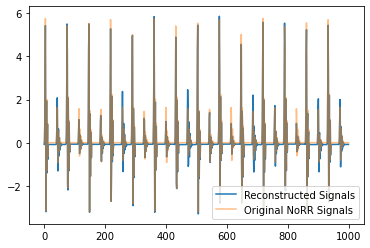

1718it [00:02, 756.70it/s]

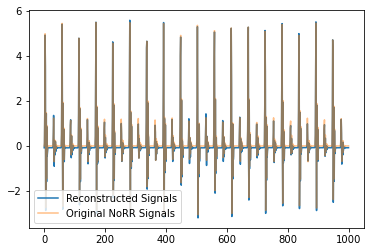

1819it [00:03, 421.37it/s]

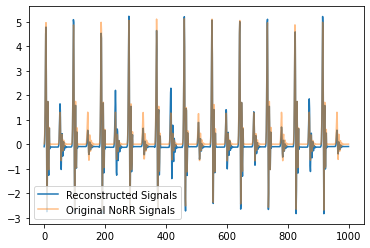

1920it [00:03, 473.39it/s]

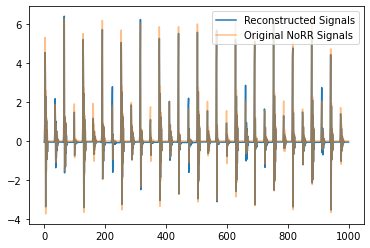

2021it [00:03, 535.42it/s]

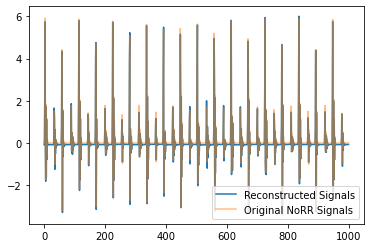

2122it [00:03, 585.41it/s]

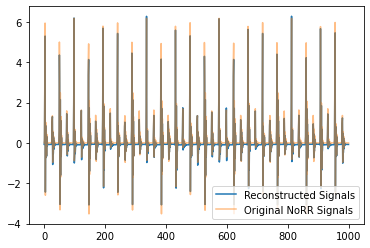

2223it [00:03, 623.97it/s]

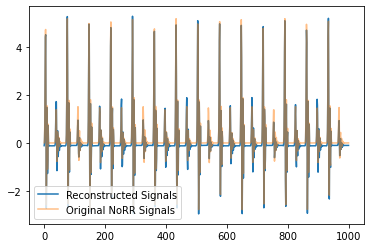

2324it [00:03, 660.50it/s]

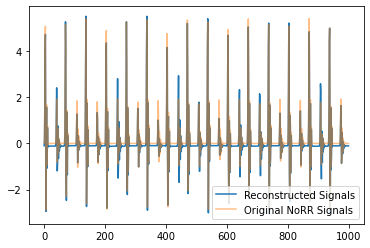

2425it [00:03, 695.94it/s]

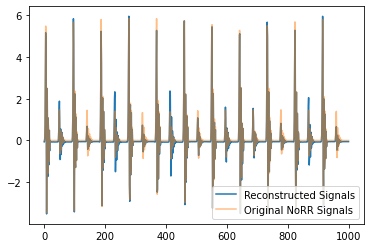

2526it [00:04, 713.84it/s]

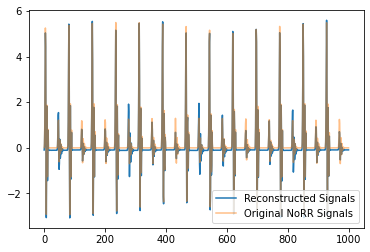

2627it [00:04, 733.27it/s]

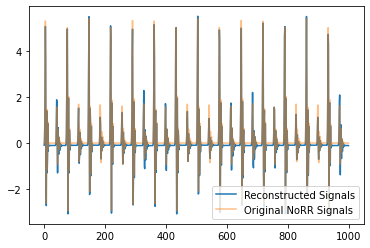

2728it [00:04, 745.80it/s]

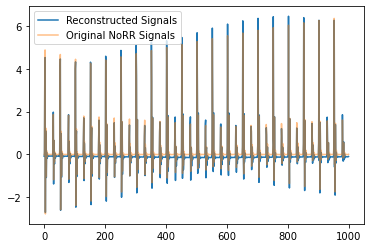

2829it [00:04, 744.86it/s]

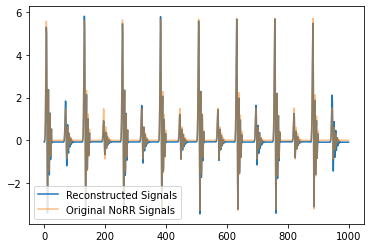

2930it [00:04, 742.59it/s]

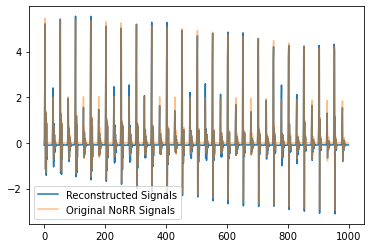

3031it [00:04, 744.25it/s]

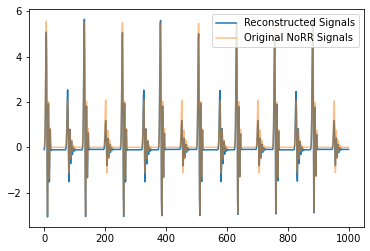

3132it [00:04, 743.77it/s]

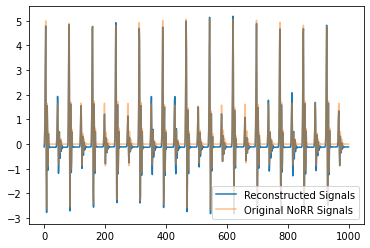

3233it [00:04, 715.00it/s]

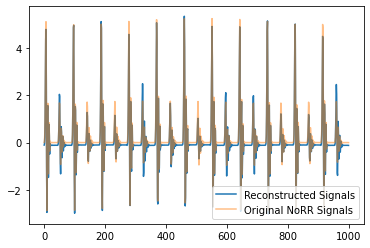

3334it [00:05, 735.72it/s]

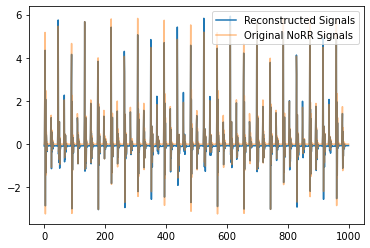

3435it [00:05, 739.40it/s]

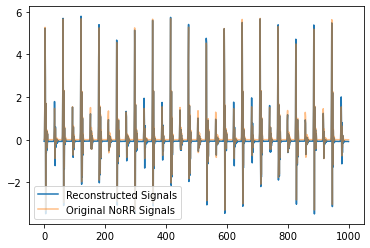

3536it [00:05, 751.95it/s]

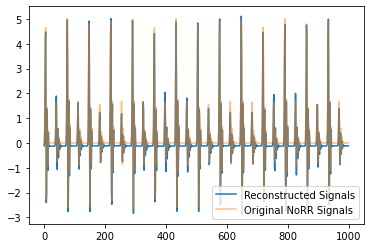

3637it [00:05, 732.81it/s]

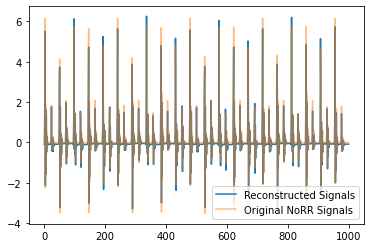

3738it [00:05, 718.48it/s]

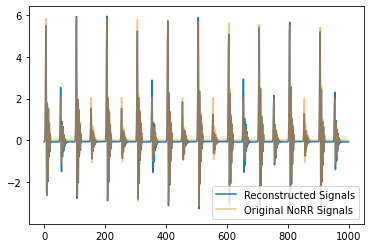

3839it [00:05, 733.47it/s]

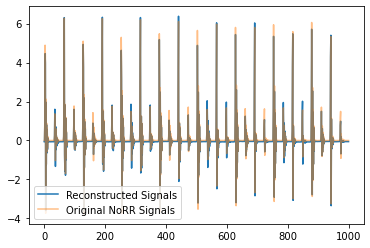

3940it [00:05, 726.66it/s]

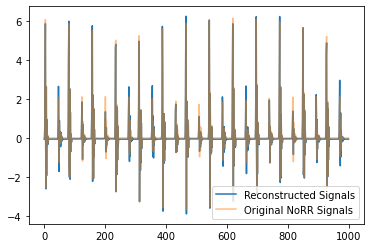

4041it [00:06, 732.97it/s]

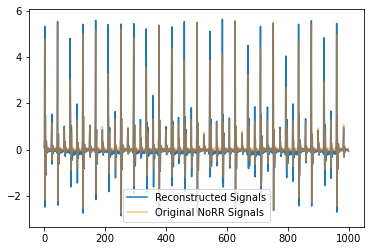

4142it [00:06, 740.66it/s]

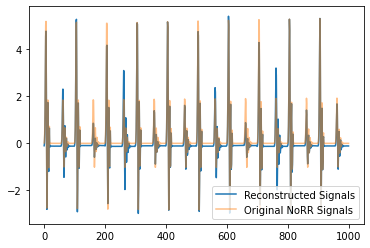

4243it [00:06, 754.54it/s]

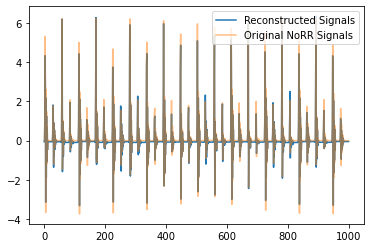

4344it [00:06, 741.02it/s]

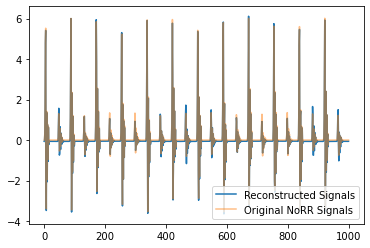

4445it [00:06, 739.93it/s]

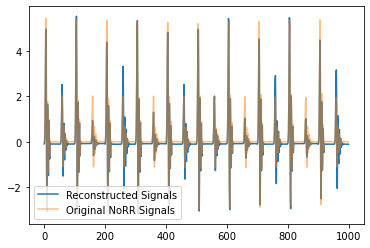

4546it [00:06, 743.98it/s]

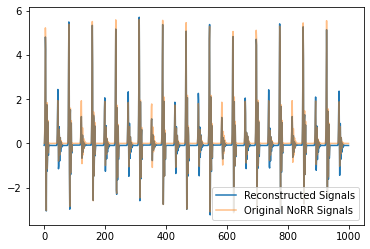

4687it [00:06, 680.65it/s]


In [180]:
def draw(NoRR_signals, signals, labels, alpha):
    show = True

    for cnt, signal in tqdm(enumerate(signals)):
        if cnt % 101 != 0:
            continue

        hr = labels[cnt, 2]

        large_peaks, _ = find_peaks(signal, height=np.max(signal) * 0.12, distance=5000 // (hr * alpha))

        # RR
        reconstructed_signal = segmentation(signal, large_peaks)

        allpeaks, _ = find_peaks(reconstructed_signal, height=np.max(reconstructed_signal) * 0.1, distance=2000 // (hr * alpha))
        allpeaks = update_array(allpeaks, reconstructed_signal / np.max(reconstructed_signal))
        if len(allpeaks) % 2 != 0:
            allpeaks = np.delete(allpeaks, len(allpeaks) - 1)

        # features = get_features(reconstructed_signal, allpeaks)


        if show:

            # plt.subplots(2, 1, figsize=(12, 6))
            # plt.subplot(211)
            # plt.title('Original NoRR Signals')
            # plt.plot(NoRR_signals[cnt])
            # plt.subplot(212)
            # plt.title('Reconstructed Signals')
            # plt.plot(reconstructed_signal)
            # plt.show()
            plt.figure()
            cof = reconstructed_signal.max() / NoRR_signals[cnt].max()
            mean_cof = NoRR_signals[cnt].mean()
            plt.plot(reconstructed_signal+0.1, label='Reconstructed Signals')
            plt.plot(NoRR_signals[cnt] * cof, label='Original NoRR Signals', alpha=0.5)
            plt.legend()
            plt.show()

draw(signals_train_NoRR, signals_train_RR, labels_train_RR, 1)
